# Linear Regression Models

we put all the notes and explanations in the word file

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [3]:
file_path = 'DataScience_salaries_2024.csv'
df = pd.read_csv(file_path)

features = ['work_year', 'experience_level', 'employment_type', 'salary_currency']
target = 'salary_in_usd'

X = pd.get_dummies(df[features], columns=['experience_level', 'employment_type', 'salary_currency'], drop_first=True)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.columns = pd.get_dummies(df[features], drop_first=True).columns

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train R2: {train_r2:.2f}")

y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R2: {test_r2:.2f}")

Train RMSE: 61772.17
Train R2: 0.20
Test RMSE: 61307.43
Test R2: 0.20


# Ridge

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_ridge_model = grid_search.best_estimator_

y_train_pred_ridge = best_ridge_model.predict(X_train_scaled)
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
print(f"Train RMSE (Ridge): {train_rmse_ridge:.2f}")
print(f"Train R2 (Ridge): {train_r2_ridge:.2f}")

y_test_pred_ridge = best_ridge_model.predict(X_test_scaled)
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
print(f"Test RMSE (Ridge): {test_rmse_ridge:.2f}")
print(f"Test R2 (Ridge): {test_r2_ridge:.2f}")

print(f"Best hyperparameter (alpha): {grid_search.best_params_['alpha']}")



Train RMSE (Ridge): 61772.17
Train R2 (Ridge): 0.20
Test RMSE (Ridge): 61307.41
Test R2 (Ridge): 0.20
Best hyperparameter (alpha): 0.1


# Lasso

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
}

lasso_model = Lasso(max_iter=10000)

grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_lasso_model = grid_search.best_estimator_

y_train_pred_lasso = best_lasso_model.predict(X_train_scaled)
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
print(f"Train RMSE (Lasso): {train_rmse_lasso:.2f}")
print(f"Train R2 (Lasso): {train_r2_lasso:.2f}")

y_test_pred_lasso = best_lasso_model.predict(X_test_scaled)
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
print(f"Test RMSE (Lasso): {test_rmse_lasso:.2f}")
print(f"Test R2 (Lasso): {test_r2_lasso:.2f}")

print(f"Best hyperparameter (alpha): {grid_search.best_params_['alpha']}")


Train RMSE (Lasso): 61777.18
Train R2 (Lasso): 0.20
Test RMSE (Lasso): 61292.56
Test R2 (Lasso): 0.20
Best hyperparameter (alpha): 100.0


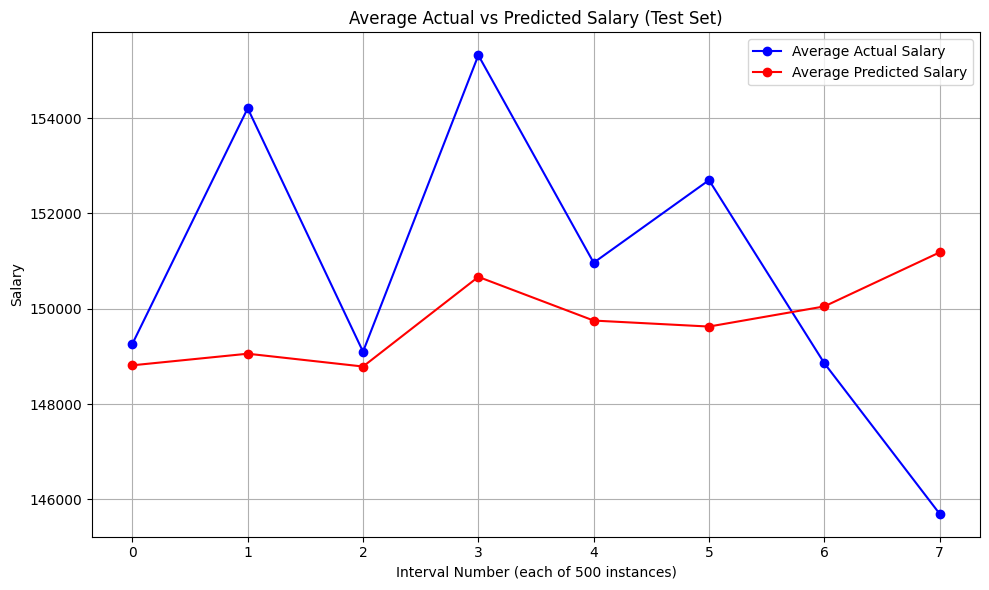

In [6]:
import matplotlib.pyplot as plt

num_intervals = len(X_test) // 500

y_true_avg = []
y_pred_avg = []

for i in range(num_intervals):
    start_idx = i * 500
    end_idx = (i + 1) * 500
    
    y_true_avg.append(np.mean(y_test[start_idx:end_idx]))
    y_pred_avg.append(np.mean(y_test_pred[start_idx:end_idx]))

plt.figure(figsize=(10, 6))
plt.plot(range(num_intervals), y_true_avg, marker='o', linestyle='-', color='b', label='Average Actual Salary')
plt.plot(range(num_intervals), y_pred_avg, marker='o', linestyle='-', color='r', label='Average Predicted Salary')
plt.title('Average Actual vs Predicted Salary (Test Set)')
plt.xlabel('Interval Number (each of 500 instances)')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


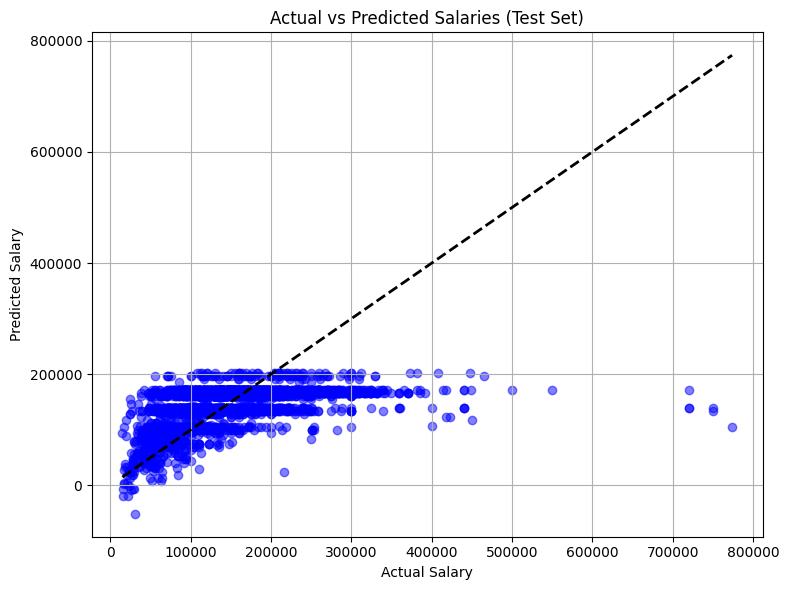

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # its the diagonal line
plt.title('Actual vs Predicted Salaries (Test Set)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()


# Rewrote the code since there was incossitency in scaling, this is just to see if anything would be different after scaling, nothing changed

Train RMSE: 61772.17
Train R2: 0.20
Test RMSE: 61307.43
Test R2: 0.20


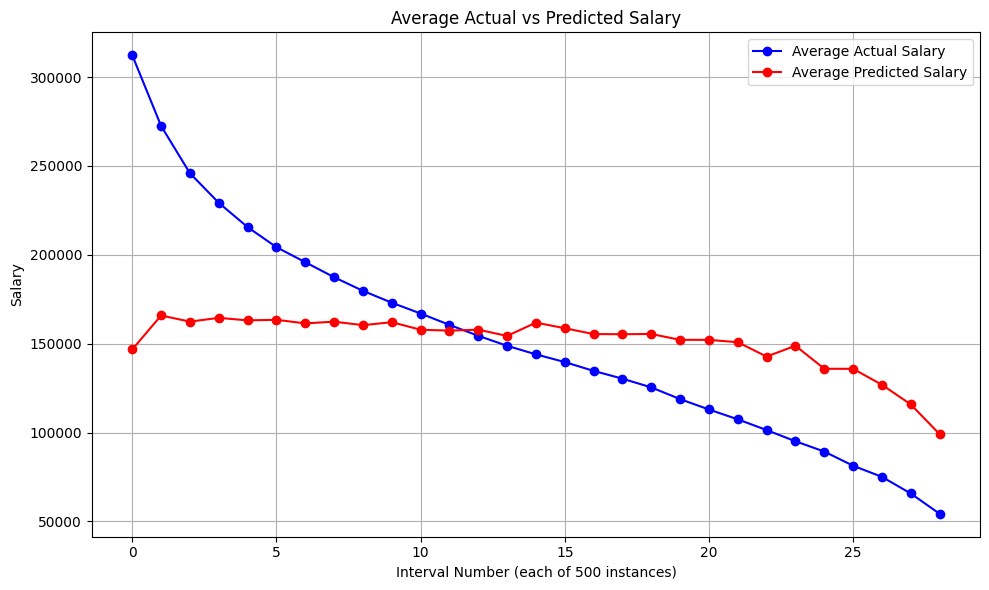

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = 'DataScience_salaries_2024.csv'
df = pd.read_csv(file_path)

features = ['work_year', 'experience_level', 'employment_type', 'salary_currency']
target = 'salary_in_usd'

X = pd.get_dummies(df[features], columns=['experience_level', 'employment_type', 'salary_currency'], drop_first=True)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train R2: {train_r2:.2f}")

y_test_pred = model.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R2: {test_r2:.2f}")

num_intervals = len(X) // 500

y_true_avg = []
y_pred_avg = []

for i in range(num_intervals):
    start_idx = i * 500
    end_idx = (i + 1) * 500
    
    interval_X = X.iloc[start_idx:end_idx]
    interval_y = y.iloc[start_idx:end_idx]
    
    interval_X_scaled = scaler.transform(interval_X)

    y_true_avg.append(np.mean(interval_y))
    
    interval_pred = model.predict(interval_X_scaled)
    y_pred_avg.append(np.mean(interval_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(num_intervals), y_true_avg, marker='o', linestyle='-', color='b', label='Average Actual Salary')
plt.plot(range(num_intervals), y_pred_avg, marker='o', linestyle='-', color='r', label='Average Predicted Salary')
plt.title('Average Actual vs Predicted Salary')
plt.xlabel('Interval Number (each of 500 instances)')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
